In [76]:
# Set the process name to be human readable in htop
import setproctitle
setproctitle.setproctitle("Prep_Interactions_List")

import helper as my
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np

import os
os.environ["TMPDIR"] = "/tmp"
import glob

from tqdm import tqdm, tqdm_notebook
from tqdm._tqdm_notebook import tqdm_notebook

tqdm.pandas(tqdm_notebook)
tqdm_notebook.pandas()

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict

import scipy

In [77]:
import re

In [ ]:
# Parse the sequence file
full_sequence = ""
tmp_coords = []
cur = None
flag = False
flag2 = False
s = None
e = None
label = None
translation = ""
with open("Gordon_et_al_GeneBank.seq", "r") as f:
    for l in f:
        if(not flag):
            if("CDS" in l):
                s, e = [int(x) for x in l.strip().split()[-1].split("..")]
                label = None
            if("/label=" in l):
                label = l.strip().split("/label=")[-1]
            if("/translation=\"" in l):
                flag2 = True
                if(len(l.split("\"")) > 2):
                    flag2 = False
                    translation = l.strip().split("=")[-1].replace("\"", "")
                    if(not s is None and not label is None):
                        tmp_coords.append((label, s, e, translation))
                else:
                    translation = l.strip().split("\"")[-1]
            elif(flag2):
                translation += l.strip().replace("\"", "")
                if("\"" in l):
                    flag2 = False
                    if(not s is None and not label is None):
                        tmp_coords.append((label, s, e, translation))
            if("ORIGIN" in l):
                flag = True
        elif(flag):
            full_sequence += l.strip().replace(" ", "").replace("/", "").split("1")[-1].upper()

In [155]:
s1 = set(sorted(AADict.keys()))

In [159]:
s2 = set(pd.read_csv("[REDACTED_PATH]/Collaborators/Lab_Member_Requests/Charles/2020_05_04_COVID19_Website/Data/Viral_Muts.txt", sep="\t")["COVID_ID"].map(lambda x: x.replace("COVID19", "")).values)

24

In [166]:
s1.difference(s2)

{'nsp16',
 'nsp3',
 'nsp5_C145A',
 'orf10',
 'orf1a',
 'orf1ab',
 'orf3b',
 'orf7b',
 'orf8'}

In [79]:
seqDict = {}
AADict = {}
for x in [x for x in tmp_coords if not "Cleavage" in x[0] and not "like" in x[0].lower() and not "mRNA" in x[0]]:
    if(x[0] == "S"):
        x = list(x)
        x[0] = "Spike"
    seqDict[x[0]] = full_sequence[x[1]-1:x[2]]
    AADict[x[0]] = my.DNA2AA(full_sequence[x[1]-1:x[2]], return_full=True)
    if(AADict[x[0]] != x[3]):
        print x[0]
        AADict[x[0]] = x[3]
seqDict["nsp5_C145A"] = seqDict["nsp5"]
AADict["nsp5_C145A"] = AADict["nsp5"]

orf1ab
nsp12


In [15]:
# Manuall Integration of COVID Proteins in to ECLAIR Data Files

In [ ]:
# STEP 1 - fetch uni info

In [62]:
uni_info = pd.read_csv("[REDACTED_PATH]/eclair/data/uniprot_info.txt", sep="\t")

In [8]:
uni_info.head()

,id,entry name,reviewed,organism-id,lineage-id(SUPERKINGDOM),length,genes,feature(ALTERNATIVE SEQUENCE),protein names,sequence
0,P30613,KPYR_HUMAN,reviewed,9606,2759,574,PKLR PK1 PKL,VAR_SEQ 1 33 MSIQENISSLQLRSWVSKSQRDLAKSILIGAPG...,Pyruvate kinase PKLR (EC 2.7.1.40) (Pyruvate k...,MSIQENISSLQLRSWVSKSQRDLAKSILIGAPGGPAGYLRRASVAQ...
1,Q9NQ76,MEPE_HUMAN,reviewed,9606,2759,525,MEPE,VAR_SEQ 1 113 Missing (in isoform 3). {ECO:000...,Matrix extracellular phosphoglycoprotein (Oste...,MRVFCVGLLLFSVTWAAPTFQPQTEKTKQSCVEEQRQEEKNKDNIG...
2,Q5H9L2,TCAL5_HUMAN,reviewed,9606,2759,206,TCEAL5,NaN,Transcription elongation factor A protein-like...,MEKLYKENEGKPENERNLESEGKPEDEGSTEDEGKSDEEEKPDMEG...
3,E3PPC4,FMC1_ECOH1,reviewed,316401,2,170,cfaB ETEC_p948_0400,NaN,CFA/I fimbrial subunit B (CFA/I antigen) (CFA/...,MKFKKTIGAMALTTMFVAVSASAVEKNITVTASVDPVIDLLQADGN...
4,P20933,ASPG_HUMAN,reviewed,9606,2759,346,AGA,NaN,N(4)-(beta-N-acetylglucosaminyl)-L-asparaginas...,MARKSNLPVLLVPFLLCQALVRCSSPLPLVVNTWPFKNATEAAWRA...


In [10]:
new_info = []
for k, v in AADict.iteritems():
    new_info.append(["COVID19_{0}".format(k).replace("_", ""), "COVID19_{0}".format(k), "reviewed", 9606, 2759, len(v), k, np.nan, k, v])
new_info = pd.DataFrame(new_info, columns=list(uni_info))

In [12]:
new_info = pd.concat([uni_info, new_info])

In [16]:
new_info.to_csv("[REDACTED_PATH]/eclair/data/uniprot_info.txt", sep="\t", index=None)

In [ ]:
# STEP 2 - parse isoforms

In [19]:
isoforms = pd.read_csv("[REDACTED_PATH]/eclair/features/per_feature/isoforms.txt", sep="\t")

In [20]:
isoforms.head()

,P35638,1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
0,Q9BQI0,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
1,Q9Y5P8,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
2,P67775,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
3,O75899,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
4,P49960,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...


In [23]:
new_isoforms = []
for k, v in AADict.iteritems():
    new_isoforms.append(["COVID19_{0}".format(k).replace("_", ""), ";".join(["0"]*len(v))])
new_isoforms = pd.DataFrame(new_isoforms, columns=list(isoforms))

In [24]:
new_isoforms

,P35638,1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
0,COVID19_nsp5_C145A,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
1,COVID19_orf7a,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
2,COVID19_orf10,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
3,COVID19_Spike,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
4,COVID19_E,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
5,COVID19_nsp5,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
6,COVID19_nsp4,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
7,COVID19_nsp7,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
8,COVID19_nsp6,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
9,COVID19_nsp1,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...


In [25]:
new_isoforms = pd.concat([isoforms, new_isoforms])

In [26]:
new_isoforms.to_csv("[REDACTED_PATH]/eclair/features/per_feature/isoforms.txt", sep="\t", index=None)

In [ ]:
# STEP 2 - parse domains

In [28]:
filename = "[REDACTED_PATH]/eclair/features/per_feature/pfam_domains.txt"
data = pd.read_csv(filename, sep="\t")

In [29]:
data.head()

,O75899,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
0,P35638,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
1,P49960,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
2,P67775,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
3,Q14160,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
4,Q96DN2,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...


In [31]:
new_data = []
for k, v in AADict.iteritems():
    new_data.append(["COVID19_{0}".format(k).replace("_", ""), ";".join(["0"]*len(v))])
new_data = pd.DataFrame(new_data, columns=list(data))

In [32]:
new_data

,O75899,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
0,COVID19_nsp5_C145A,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
1,COVID19_orf7a,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
2,COVID19_orf10,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
3,COVID19_Spike,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
4,COVID19_E,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
5,COVID19_nsp5,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
6,COVID19_nsp4,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
7,COVID19_nsp7,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
8,COVID19_nsp6,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
9,COVID19_nsp1,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...


In [33]:
new_data = pd.concat([data, new_data])

In [34]:
new_data.to_csv(filename, sep="\t", index=None)

In [ ]:
# STEP 4 - modbase_02
# Create Mock Modbase PDB Entries

'MIELSLIDFYLCFLAFLLFLVLIMLIIFWFSLELQDHNETCHA'

In [141]:
# Parse all homology models to match up with sequence positions
for f in glob.glob("modelling_test/*.B*.pdb"):
    base = os.path.basename(f).split(".")[0]
    if(not base in AADict):
        continue
    else:
        pdb_df = my.pdb2df(f)
        pdb_seq = "".join(pdb_df.drop_duplicates("Residue ID")["Residue Sym"])
        pdb_df["Chain"] = " "
        true_seq = AADict[base]
        if(not pdb_seq in true_seq):
            print "ERROR"
            1/0
        offset = AADict[base].find("".join(pdb_df.drop_duplicates("Residue ID")["Residue Sym"]))
        pdb_df["Residue ID"] = pdb_df["Residue ID"] + offset
        print base, offset
        print pdb_df[["Residue ID", "Residue Sym"]].apply(lambda x: true_seq[x[0]-1] == x[1], axis=1).all()
        
        header = open("[REDACTED_PATH]/eclair/data/modbase/models/headers/{0}.txt".format(base), "w+")
        header.write("{0}\t{1}\t{2}\tNone\t{3}\t{4}\t100\t1.00\t2.00\t-0.5\t0\t{5}".format("COVID19_{0}".format(base).replace("_", ""), len(pdb_df.drop_duplicates("Residue ID")), len(true_seq), pdb_df["Residue ID"].min(), pdb_df["Residue ID"].max(), base))
        header.close()
        
        my.df2pdb("[REDACTED_PATH]/eclair/data/modbase/models/hash/{0}.pdb".format(base), pdb_df)

orf7a 15
True
orf8 0
True
nsp15 0
True
nsp7 0
True
nsp5_C145A 0
True
orf6 0
True
nsp1 11
True
nsp8 0
True
nsp2 0
True
nsp4 0
True
Spike 13
True
orf9b 10
True
nsp10 0
True
nsp9 0
True
nsp5 0
True
nsp14 0
True
nsp12 116
True
orf9c 0
True
nsp13 0
True


In [151]:
tmp = pd.read_csv("[REDACTED_PATH]/eclair/data/modbase/models/parsed/all_modbase_models.txt", sep="\t")
tmp.ix[tmp["uniprot"].map(lambda x: "COV" in x), "target_length"] = tmp.ix[tmp["uniprot"].map(lambda x: "COV" in x), :]["uniprot"].map(lambda x: len(AADict[x.split("19")[1].split("C145A")[0]]))
tmp.to_csv("[REDACTED_PATH]/eclair/data/modbase/models/parsed/all_modbase_models.txt", sep="\t", index=None)

[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [152]:
tmp = pd.read_csv("[REDACTED_PATH]/eclair/data/modbase/models/parsed/select_modbase_models.txt", sep="\t")
tmp.ix[tmp["uniprot"].map(lambda x: "COV" in x), "target_length"] = tmp.ix[tmp["uniprot"].map(lambda x: "COV" in x), :]["uniprot"].map(lambda x: len(AADict[x.split("19")[1].split("C145A")[0]]))
tmp.to_csv("[REDACTED_PATH]/eclair/data/modbase/models/parsed/select_modbase_models.txt", sep="\t", index=None)

[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


3281        COVID19Spike
3282         COVID19nsp1
3283        COVID19nsp10
3284        COVID19nsp12
3285        COVID19nsp13
3286        COVID19nsp14
3287        COVID19nsp15
3288         COVID19nsp2
3289         COVID19nsp4
3290         COVID19nsp5
3291    COVID19nsp5C145A
3292         COVID19nsp7
3293         COVID19nsp8
3294         COVID19nsp9
3295         COVID19orf6
3296        COVID19orf7a
3297         COVID19orf8
3298        COVID19orf9b
3299        COVID19orf9c
Name: uniprot, dtype: object

True

In [47]:
print "".join(pdb_df.drop_duplicates("Residue ID")["Residue Sym"])
print AADict[base]

ELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRARSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKT
MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRARSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKTE


In [48]:
AADict[base].find("".join(pdb_df.drop_duplicates("Residue ID")["Residue Sym"]))

15

In [50]:
AADict[base][15+1]

'L'

In [80]:
for k, v in AADict.iteritems():
    print ">{0}\n{1}".format(k, v)

>nsp5_C145A
SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVTFQ
>orf7a
MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRARSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKTE
>orf10
MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT
>Spike
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQP

In [81]:
for x in interactome["Bait"].unique():
    if(x in Fasta_Dict):
        if(AADict[x] == Fasta_Dict[x]):
            print "oooooooooooooooooooooooo"
            print "SEQS IDENTICAL", x
            print "oooooooooooooooooooooooo"
        else:
            print x
            my.NWSeqAlignment(Fasta_Dict[x], AADict[x], show_align=True)
            print
            print
    else:
        print "__________________________"
        print "DOES NOT INCLUDE", x
        print "__________________________"

NameError: name 'Fasta_Dict' is not defined

In [82]:
#for x in seqDict:
#    print x
#    s = seqDict[x]
#    s2 = "".join([my.codon_mapping_U[s[i*3:i*3+3]] for i in range(len(s) / 3)])
#    print s2
#    print len(s2.split("*"))
#    print

In [83]:
AADict

{'E': 'MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSSRVPDLLV',
 'M': 'MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLACFVLAAVYRINWITGGIAIAMACLVGLMWLSYFIASFRLFARTRSMWSFNPETNILLNVPLHGTILTRPLLESELVIGAVILRGHLRIAGHHLGRCDIKDLPKEITVATSRTLSYYKLGASQRVAGDSGFAAYSRYRIGNYKLNTDHSSSSDNIALLVQ',
 'N': 'MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNTASWFTALTQHGKEDLKFPRGQGVPINTNSSPDDQIGYYRRATRRIRGGDGKMKDLSPRWYFYYLGTGPEAGLPYGANKDGIIWVATEGALNTPKDHIGTRNPANNAAIVLQLPQGTTLPKGFYAEGSRGGSQASSRSSSRSRNSSRNSTPGSSRGTSPARMAGNGGDAALALLLLDRLNQLESKMSGKGQQQQGQTVTKKSAAEASKKPRQKRTATKAYNVTQAFGRRGPEQTQGNFGDQELIRQGTDYKHWPQIAQFAPSASAFFGMSRIGMEVTPSGTWLTYTGAIKLDDKDPNFKDQVILLNKHIDAYKTFPPTEPKKDKKKKADETQALPQRQKKQQTVTLLPAADLDDFSKQLQQSMSSADSTQA',
 'Spike': 'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLA

In [169]:
# Read in Interactome
interactome = pd.read_csv("COVID19_Interactome.txt", sep="\t")

In [170]:
# Read in Yuans Seqs
seqs = pd.read_csv("COVID19_Sequences.txt", sep="\t")

In [171]:
seqs

,Krogan_Name,Gene,Seq
0,SARS-CoV2 Spike,S protein（21563-25384）,ATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTT...
1,SARS-CoV2 orf3a,orf3a（25939-26220）,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...
2,SARS-CoV2 E,E protein （26245-26472）,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...
3,SARS-CoV2 M,M protein （26532-27191）,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...
4,SARS-CoV2 orf6,orf6 （27202-27387）,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...
5,SARS-CoV2 orf7a,orf7a （27394-27759）,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...
6,NaN,orf7b （27756-27887）,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...
7,SARS-CoV2 orf8,orf8 （27894-28259）,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...
8,SARS-CoV2 N,N protein （28274-29553）,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...
9,SARS-CoV2 orf10,orf10 （29558-29674）,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...


In [172]:
interactome["Bait"].value_counts()

SARS-CoV2 orf8          47
SARS-CoV2 nsp13         40
SARS-CoV2 nsp7          32
SARS-CoV2 M             30
SARS-CoV2 orf9c         26
SARS-CoV2 nsp8          24
SARS-CoV2 nsp12         20
SARS-CoV2 nsp9          16
SARS-CoV2 N             15
SARS-CoV2 orf9b         11
SARS-CoV2 orf10          9
SARS-CoV2 nsp4           8
SARS-CoV2 orf3a          8
SARS-CoV2 nsp2           7
SARS-CoV2 nsp1           6
SARS-CoV2 E              6
SARS-CoV2 nsp10          5
SARS-CoV2 nsp6           4
SARS-CoV2 orf6           3
SARS-CoV2 nsp15          3
SARS-CoV2 nsp14          3
SARS-CoV2 Spike          2
SARS-CoV2 nsp5_C145A     2
SARS-CoV2 orf7a          2
SARS-CoV2 nsp11          1
SARS-CoV2 nsp5           1
SARS-CoV2 orf3b          1
Name: Bait, dtype: int64

In [173]:
interactome["Bait"] = interactome["Bait"].map(lambda x: x.split()[-1])

In [174]:
seqs["Krogan_Name"] = seqs["Krogan_Name"].map(lambda x: str(x).split()[-1])

seqs["Yuan Seq"] = seqs["Seq"]
seqs["Seq"] = seqs["Krogan_Name"].map(lambda  x: seqDict[x] if not x == "nan" else np.nan)

In [175]:
seqs = seqs[(seqs["Krogan_Name"] != "nan")&~pd.isnull(seqs["Seq"])]

In [176]:
#seqs["AA"] = seqs["Seq"].map(lambda x: my.DNA2AA(x))
seqs["AA"] = seqs["Krogan_Name"].map(lambda x: AADict[x])

[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [177]:
seqs

,Krogan_Name,Gene,Seq,Yuan Seq,AA
0,Spike,S protein（21563-25384）,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,ATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTT...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
1,orf3a,orf3a（25939-26220）,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,MDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWL...
2,E,E protein （26245-26472）,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...
3,M,M protein （26532-27191）,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...
4,orf6,orf6 （27202-27387）,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,MFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTE...
5,orf7a,orf7a （27394-27759）,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...
7,orf8,orf8 （27894-28259）,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,MKFLVFLGIITTVAAFHQECSLQSCTQHQPYVVDDPCPIHFYSKWY...
8,N,N protein （28274-29553）,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...
9,orf10,orf10 （29558-29674）,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT
11,nsp1,nsp1(266-805),ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...


In [178]:
print len(seqs)

print len(interactome["Bait"].unique())

27
27


In [179]:
Fasta_Dict = {}
Fasta_Dict.update(seqs.set_index(["Krogan_Name"])["AA"].to_dict())

for uni in interactome["Preys"].values:
    Fasta_Dict[uni] = my.get_Fasta(uni)
    print uni, Fasta_Dict[uni][:100]

O00203 MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNEDLKQMLESNKDSAKLDAMKRIVGMIAKGKNASELFPAVVKNVASKNIEIKKLVYV
O60885 MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPPPPETSNPNKPKRQTNQLQYLLRVVLKTLWKHQFAWPFQQPVDAVKLNLPDYYKI
P25440 MLQNVTPHNKLPGEGNAGLLGLGPEAAAPGKRIRKPSLLYEGFESPTMASVPALQLTPANPPPPEVSNPKKPGRVTNQLQYLHKVVMKALWKHQFAWPFR
Q6UX04 MSNIYIQEPPTNGKVLLKTTAGDIDIELWSKEAPKACRNFIQLCLEAYYDNTIFHRVVPGFIVQGGDPTGTGSGGESIYGAPFKDEFHSRLRFNRRGLVA
Q86VM9 MDVAESPERDPHSPEDEEQPQGLSDDDILRDSGSDQDLDGAGVRASDLEDEESAARGPSQEEEDNHSDEEDRASEPKSQDQDSEVNELSRGPTSSPCEEE
Q8IWA5 MGDERPHYYGKHGTPQKYDPTFKGPIYNRGCTDIICCVFLLLAIVGYVAVGIIAWTHGDPRKVIYPTDSRGEFCGQKGTKNENKPYLFYFNIVKCASPLV
O75439 MAAAAARVVLSSAARRRLWGFSESLLIRGAAGRSLYFGENRLRSTQAATQVVLNVPETRVTCLESGLRVASEDSGLSTCTVGLWIDAGSRYENEKNNGTA
O95070 MAYHSGYGAHGSKHRARAAPDPPPLFDDTSGGYSSQPGGYPATGADVAFSVNHLLGDPMANVAMAYGSSIASHGKDMVHKELHRFVSVSKLKYFFAVDTA
P05026 MARGKAKEEGSWKKFIWNSEKKEFLGRTGGSWFKILLFYVIFYGCLAGIFIGTIQVMLLTISEFKPTYQDRVAPPGLTQIPQIQKTEISFRPNDPKSYEA
P11310 MAAGFGRCCRVLRSISRFHWR

Q5VUA4 MYRSSARSSVSSHRPKDDGGGGPRSGRSSGSSSGPARRSSPPPPPSGSSSRTPARRPRSPSGHRGRRASPSPPRGRRVSPSPPRARRGSPSPPRGRRLFP
Q6UUV7 MAASPGSGSANPRKFSEKIALHTQRQAEETRAFEQLMTDLTLSRVQFQKLQQLRLTQYHGGSLPNVSQLRSSASEFQPSFHQADNVRGTRHHGLVERPSR
Q70EL1 MSWKRNYFSGGRGSVQGMFAPRSSTSIAPSKGLSNEPGQNSCFLNSALQVLWHLDIFRRSFRQLTTHKCMGDSCIFCALKGIFNQFQCSSEKVLPSDTLR
Q8IWR0 MSNVSEERRKRQQNIKEGLQFIQSPLSYPGTQEQYAVYLRALVRNLFNEGNDVYREHDWNNSISQYTEALNIADYAKSEEILIPKEIIEKLYINRIACYS
Q92615 MTSDQDAKVVAEPQTQRVQEGKDSAHLMNGPISQTTSQTSSIPPLSQVPATKVSELNPNAEVWGAPVLHLEASSAADGVSAAWEEVAGHHADRGPQGSDA
Q96IZ5 MKRVNSCVKSDEHVLEELETEGERQLKSLLQHQLDTSVSIEECMSKKESFAPGTMYKPFGKEAAGTMTLSQFQTLHEKDQETASLRELGLNETEILIWKS
Q99081 MNPQQQRMAAIGTDKELSDLLDFSAMFSPPVNSGKTRPTTLGSSQFSGSGIDERGGTTSWGTSGQPSPSYDSSRGFTDSPHYSDHLNDSRLGAHEGLSPT
Q9H2H8 MSVTLHTDVGDIKIEVFCERTPKTCENFLALCASNYYNGCIFHRNIKGFMVQTGDPTGTGRGGNSIWGKKFEDEYSEYLKHNVRGVVSMANNGPNTNGSQ
Q9HAU0 MAADLNLEWISLPRSWTYGITRGGRVFFINEEAKSTTWLHPVTGEAVVTGHRRQSTDLPTGWEEAYTFEGARYYINHNERKVTCKHPVTGQPSQDNCIFV
A7MCY6 MESMFEDDISILTQEALGPSE

O00116 MAEAAAAAGGTGLGAGASYGSAADRDRDPDPDRAGRRLRVLSGHLLGRPREALSTNECKARRAASAATAAPTATPAAQESGTIPKKRQEVMKWNGWGYND
O43169 MSGSMATAEASGSDGKGQEVETSVTYYRLEEVAKRNSLKELWLVIHGRVYDVTRFLNEHPGGEEVLLEQAGVDASESFEDVGHSSDAREMLKQYYIGDIH
O95573 MNNHVSSKPSTMKLKHTINPILLYFIHFLISLYTILTYIPFYFFSESRQEKSNRIKAKPVNSKPDSAYRSVNSLDGLASVLYPGCDTLDKVFTYAKNKFK
P00387 MGAQLSTLGHMVLFPVWFLYSLLMKLFQRSTPAITLESPDIKYPLRLIDREIISHDTRRFRFALPSPQHILGLPVGQHIYLSARIDGNLVVRPYTPISSD
P11233 MAANKPKGQNSLALHKVIMVGSGGVGKSALTLQFMYDEFVEDYEPTKADSYRKKVVLDGEEVQIDILDTAGQEDYAAIRDNYFRSGEGFLCVFSITEMES
P21964 MPEAPPLLLAAVLLGLVLLVVLLLLLRHWGWGLCLIGWNEFILQPIHNLLMGDTKEQRILNHVLQHAEPGNAQSVLEAIDTYCEQKEWAMNVGDKKGKIV
P51148 MAGRGGAARPNGPAAGNKICQFKLVLLGESAVGKSSLVLRFVKGQFHEYQESTIGAAFLTQTVCLDDTTVKFEIWDTAGQERYHSLAPMYYRGAQAAIVV
P51149 MTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATIGADFLTKEVMVDDRLVTMQIWDTAGQERFQSLGVAFYRGADCCVLVFDVTAPNTFKTLD
P61006 MAKTYDYLFKLLLIGDSGVGKTCVLFRFSEDAFNSTFISTIGIDFKIRTIELDGKRIKLQIWDTAGQERFRTITTAYYRGAMGIMLVYDITNEKSFDNIR
P61019 MAYAYLFKYIIIGDTGVGKSC

Q9Y5J9 MAELGEADEAELQRLVAAEQQKAQFTAQVHHFMELCWDKCVEKPGNRLDSRTENCLSSCVDRFIDTTLAITSRFAQIVQKGGQ
P62877 MAAAMDVDTPSGTNSGAGKKRFEVKKWNAVALWAWDIVVDNCAICRNHIMDLCIECQANQASATSEECTVAWGVCNHAFHFHCISRWLKTRQVCPLDNRE
Q15369 MDGEEKTYGGCEGPDAMYVKLISSDGHEFIVKREHALTSGTIKAMLSGPGQFAENETNEVNFREIPSHVLSKVCMYFTYKVRYTNSSTEIPEFPIAPEIA
Q15370 MDVFLMIRRHKTTIFTDAKESSTVFELKRIVEGILKRPPDEQRLYKDDQLLDDGKTLGECGFTSQTARPQAPATVGLAFRADDTFEALCIEPFSSPPELP
P09601 MERPQPDSMPQDLSEALKEATKEVHTQAENAEFMRNFQKGQVTRDGFKLVMASLYHIYVALEEEIERNKESPVFAPVYFPEELHRKAALEQDLAFWYGPR
Q8IWR1 MHNFEEELTCPICYSIFEDPRVLPCSHTFCRNCLENILQASGNFYIWRPLRIPLKCPNCRSITEIAPTGIESLPVNFALRAIIEKYQQEDHPDIVTCPEH
Q8N6S5 MSFAESGWRSALRRRGPGTPGPVARPSYSSFTQGDSWGEGEVDEEEGCDQVARDLRAEFSAGAWSEPRKRSVLPPDGNGSPVLPDKRNGIFPAAAGSRAQ
Q96JC1 MHDAFEPVPILEKLPLQIDCLAAWEEWLLVGTKQGHLLLYRIRKDVVPADVASPESGSCNRFEVTLEKSNKNFSKKIQQIHVVSQFKILVSLLENNIYVH
Q96S66 MLCSLLLCECLLLVAGYAHDDDWIDPTDMLNYDAASGTMRKSQAKYGISGEKDVSPDLSCADEISECYHKLDSLTYKIDECEKKKREDYESQSNPVFRRY
Q9H270 MAAYLQWRRFVFFDKELVKEPLSNDGAAPGATPASGSA

O43292 MGLLSDPVRRRALARLVLRLNAPLCVLSYVAGIAWFLALVFPPLTQRTYMSENAMGSTMVEEQFAGGDRARAFARDFAAHRKKSGALPVAWLERTMRSVG
O76024 MDSNTAPLGPSCPQPPPAPQPQARSRLNATASLEQERSERPRAPGPQAGPGPGVRDAAAPAEPQAQHTRSRERADGTGPTKGDMEIPFEEVLERAKAGDP
P33527 MALRGFCSADGSDPLWDWNVTWNTSNPDFTKCFQNTVLVWVPCFYLWACFPFYFLYLSRHDRGYIQMTPLNKTKTALGFLLWIVCWADLFYSFWERSRGI
P55085 MRSPSAAWLLGAAILLAASLSCSGTIQGTNRSSKGRSLIGKVDGTSHVTGKGVTVETVFSVDEFSASVLTGKLTTVFLPIVYTIVFVVGLPSNGMALWVF
Q12770 MTLTERLREKISRAFYNHGLLCASYPIPIILFTGFCILACCYPLLKLPLPGTGPVEFTTPVKDYSPPPVDSDRKQGEPTEQPEWYVGAPVAYVQQIFVKS
Q2PZI1 MEGRPPPEGRPPPRPRTGRAPRGRRRAVFAAVLHWSHITHLFENDRHFSHLSTLEREMAFRTEMGLYYSYFKTIVEAPSFLNGVWMIMNDKLTEYPLVIN
Q5BJF2 MGAPATRRCVEWLLGLYFLSHIPITLFMDLQAVLPRELYPVEFRNLLKWYAKEFKDPLLQEPPAWFKSFLFCELVFQLPFFPIATYAFLKGSCKWIRTPA
Q6NXT4 MGTIHLFRKPQRSFFGKLLREFRLVAADRRSWKILLFGVINLICTGFLLMWCSSTNSIALTAYTYLTIFDLFSLMTCLISYWVTLRKPSPVYSFGFERLE
Q6NXT6 MAGVGDAAAPGEGGGGGVDGPQRDGRGEAEQPGGSGGQGPPPAPQLTETLGFYESDRRRERRRGRTELSLLRFLSAELTRGYFLEHNEAKYTERRERVYT
Q7Z2K6 MEWGSESAAVRRHRVGVERRE

In [95]:
my.dict2fasta("Bait_Prey_List.fasta", Fasta_Dict)

In [180]:
print len(interactome)
print len(interactome[interactome["Bait"].map(lambda x: x in Fasta_Dict)])

332
332


In [123]:
interactome[interactome["Bait"].map(lambda x: x in Fasta_Dict)][["Bait", "Preys"]].to_csv("Bait_Prey_Pairs.txt", sep="\t", index=None)

In [181]:
!pwd

[REDACTED_PATH]Collaborators/Lab_Member_Requests/Haiyuan/2020_03_27_COVID19_3DInteractome


In [305]:
out = my.runBlast("Bait_Prey_List.fasta", db="[REDACTED_PATH]/Homology_Modeling/PDB_All.fasta", dbtype="prot", fresh=True)

In [184]:
out = ["blast_Bait_Prey_List_to_PDB_All"]

In [185]:
tmp = my.blast2df(out[0])

In [186]:
len(tmp["qseqid"].unique())

335

In [187]:
print set(Fasta_Dict).difference(tmp["qseqid"].unique())

set(['Q15904', 'Q9UBU6', 'orf3b', 'Q9BSF4', 'Q8IZ52', 'O95260', 'Q00765', 'orf10', 'nsp6', 'Q9BV73', 'Q9NZJ7', 'Q8NCA5', 'Q8N8E3', 'Q9BZQ6', 'orf3a', 'M', 'Q8N6S5', 'nsp11', 'O43292', 'Q9NV92', 'Q9ULX6', 'Q96HR9', 'Q96A26', 'Q96S66'])


In [188]:
len(tmp[tmp["pident"] >= 30]["qseqid"].unique())

315

In [189]:
print set(Fasta_Dict).difference(tmp[tmp["pident"] >= 30]["qseqid"].unique())

set(['Q15904', 'Q96MM7', 'Q96JC1', 'Q9BSF4', 'Q8IZ52', 'Q9BQ95', 'Q99567', 'orf10', 'Q8IWA5', 'A3KN83', 'nsp6', 'Q8N8E3', 'Q9BZQ6', 'nsp11', 'P38435', 'O95260', 'orf8', 'Q3KQU3', 'Q08378', 'Q9H3K2', 'Q8IUD2', 'Q96S66', 'Q9UBU6', 'Q2PZI1', 'O76061', 'O43292', 'Q00765', 'Q9NV92', 'O95613', 'Q9BV73', 'Q99996', 'Q9NZJ7', 'Q14789', 'Q8NCA5', 'Q6NXT4', 'orf3b', 'orf3a', 'Q9GZU3', 'M', 'Q8N6S5', 'Q9ULX6', 'P49454', 'Q96HR9', 'Q96A26'])


In [190]:
all_merged = []
for uni1, uni2 in tqdm_notebook(interactome[["Bait", "Preys"]].values):
    t1 = tmp[tmp["qseqid"] == uni1]
    t2 = tmp[tmp["qseqid"] == uni2]
    
    t1["PDB"] = t1["sseqid"].map(lambda x: x.split(":")[0])
    t1["Chain"] = t1["sseqid"].map(lambda x: x.split(":")[1])
    
    t2["PDB"] = t2["sseqid"].map(lambda x: x.split(":")[0])
    t2["Chain"] = t2["sseqid"].map(lambda x: x.split(":")[1])
    
    merged = t1.join(t2.set_index("PDB"), on="PDB", lsuffix=" A", rsuffix=" B", how="inner")
    print uni1, uni2, len(merged)
    
    merged = merged[merged["Chain A"] != merged["Chain B"]]
    
    all_merged.append(merged)

[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

E O00203 0
E O60885 0
E P25440 0
E Q6UX04 0
E Q86VM9 0
E Q8IWA5 0
M O75439 0
M O95070 0
M P05026 0
M P11310 0
M P13804 0
M P27105 0
M P38435 0
M P38606 0
M P48556 0
M Q00765 0
M Q10713 0
M Q4KMQ2 0
M Q5JRX3 0
M Q6PML9 0
M Q7L8L6 0
M Q8NEW0 0
M Q96CW5 0
M Q96D53 0
M Q96ER3 0
M Q96HR9 0
M Q96HW7 0
M Q9BQT8 0
M Q9BSJ2 0
M Q9BW92 0
M Q9NQC3 0
M Q9UBU6 0
M Q9UDR5 0
M Q9ULX6 0
M Q9Y312 0
M Q9Y6E2 0
N O43818 0
N P11940 0
N P19784 0
N P67870 0
N Q13283 0
N Q13310 0
N Q6PKG0 0
N Q8NCA5 0
N Q8TAD8 0
N Q92900 0
N Q9HCE1 0
N Q9UN86 0
N Q9NR30 0
N Q9NW13 0
N Q9Y3U8 0
Spike Q7Z5G4 0
Spike Q9C0B5 0
nsp1 P09884 0
nsp1 P49642 0
nsp1 P49643 0
nsp1 Q14181 0
nsp1 Q8NBJ5 0
nsp1 Q99959 0
nsp10 O94973 0
nsp10 P55789 0
nsp10 Q969X5 0
nsp10 Q96CW1 0
nsp10 Q9HAV7 0
nsp11 O75347 0
nsp12 A3KN83 0
nsp12 O14874 0
nsp12 O43823 0
nsp12 O75592 0
nsp12 O95391 0
nsp12 Q13546 0
nsp12 Q14157 0
nsp12 Q2T9J0 0
nsp12 Q5EBL8 0
nsp12 Q5JSZ5 0
nsp12 Q5T6F2 0
nsp12 Q5VUA4 0
nsp12 Q6UUV7 0
nsp12 Q70EL1 0
nsp12 Q8IWR0 0
nsp12 Q926

In [191]:
all_merged = pd.concat(all_merged)

In [192]:
len(all_merged)

108

In [193]:
len(all_merged.drop_duplicates(["qseqid A", "qseqid B"]))

3

In [194]:
all_merged.drop_duplicates(["qseqid A", "qseqid B"])

,qseqid A,sseqid A,pident A,length A,mismatch A,gapopen A,qstart A,qend A,sstart A,send A,evalue A,bitscore A,PDB,Chain A,qseqid B,sseqid B,pident B,length B,mismatch B,gapopen B,qstart B,qend B,sstart B,send B,evalue B,bitscore B,Chain B
100322,nsp13,6ID1:Q,29.17,120,76,5,218,329,709,827,0.033,40.0,6ID1,Q,Q04724,6ID1:E,26.32,247,168,7,533,767,16,260,4.000000e-15,79.7,E
100322,nsp13,6ID1:Q,29.17,120,76,5,218,329,709,827,0.033,40.0,6ID1,Q,Q04726,6ID1:E,25.91,247,169,7,535,769,16,260,3.000000e-15,79.7,E
100322,nsp13,6ID1:Q,29.17,120,76,5,218,329,709,827,0.033,40.0,6ID1,Q,Q7Z7A1,6ID1:o,31.03,116,80,0,152,267,46,161,2.000000e-05,50.1,o


In [195]:
[x for x in Fasta_Dict if len(x) != 6]

['orf10',
 'orf3b',
 'orf3a',
 'N',
 'orf6',
 'orf8',
 'orf7a',
 'Spike',
 'nsp5',
 'nsp4',
 'nsp7',
 'nsp6',
 'nsp1',
 'nsp2',
 'nsp9',
 'nsp8',
 'nsp15',
 'nsp14',
 'nsp11',
 'nsp10',
 'nsp13',
 'nsp12',
 'orf9c',
 'orf9b',
 'E',
 'nsp5_C145A',
 'M']

In [196]:
pdbs = set(tmp[tmp["qseqid"].map(lambda x: len(x)) != 6]["sseqid"].map(lambda x: x.split(":")[0]).values)
#pdbs = set(tmp[tmp["qseqid"].map(lambda x: x == "Spike")]["sseqid"].map(lambda x: x.split(":")[0]).values)

In [197]:
tmp2 = tmp[(tmp["sseqid"].map(lambda x: x.split(":")[0] in pdbs))&(tmp["qseqid"].map(lambda x: len(x) == 6))]

In [198]:
tmp2

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
7568,Q9Y276,5VHN:B,32.56,172,82,6,196,350,21,175,1.000000e-13,73.2
7588,Q9Y276,5VHH:B,32.56,172,82,6,196,350,94,248,5.000000e-13,72.4
7589,Q9Y276,5VHF:B,32.56,172,82,6,196,350,94,248,5.000000e-13,72.4
7591,Q9Y276,1IY0:A,31.79,151,86,3,205,348,24,164,5.000000e-13,70.9
7600,Q9Y276,5VHN:C,30.82,159,87,5,199,350,2,144,9.000000e-13,70.1
7603,Q9Y276,1IY2:A,31.79,151,85,4,205,348,30,169,1.000000e-12,70.1
7606,Q9Y276,4EIW:E,32.68,153,89,4,205,348,28,175,1.000000e-12,72.0
7607,Q9Y276,4EIW:C,32.68,153,89,4,205,348,28,175,1.000000e-12,72.0
7608,Q9Y276,4EIW:A,32.68,153,89,4,205,348,28,175,1.000000e-12,72.0
7609,Q9Y276,2DHR:E,32.68,153,89,4,205,348,29,176,1.000000e-12,71.6


In [319]:
tmp2.sample(10)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [199]:
l1 = tmp[tmp["sseqid"].map(lambda x: "6U7K" in x)]["qseqid"].values
baits = set([x for x in l1 if len(x) != 6])

for b in baits:
    print b
    print set(l1).intersection(interactome[interactome["Bait"] == b]["Preys"].to_list())

Spike
set([])


In [200]:
tmp[(tmp["qseqid"].map(lambda x: len(x) != 6))&(tmp["pident"] >= 90)].drop_duplicates("qseqid")

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
58600,N,1SSK:A,92.70,137,10,0,44,180,1,137,3.000000e-90,275.0
89076,orf7a,1YO4:A,90.48,84,7,1,16,98,1,84,1.000000e-49,158.0
96279,Spike,6LXT:C,100.00,77,0,0,912,988,1,77,6.000000e-41,150.0
98366,nsp5,2GZ7:A,96.08,306,12,0,1,306,1,306,0.000000e+00,623.0
98622,nsp7,1YSY:A,98.80,83,1,0,1,83,1,83,7.000000e-52,162.0
98675,nsp9,1UW7:A,97.35,113,3,0,1,113,1,113,3.000000e-77,229.0
98699,nsp8,2AHM:H,97.38,191,5,0,2,192,1,191,1.000000e-135,384.0
100223,nsp14,5C8U:D,92.95,525,26,1,1,525,1,514,0.000000e+00,1037.0
100239,nsp10,5NFY:P,98.47,131,2,0,1,131,1,131,4.000000e-92,268.0
100313,nsp13,6JYT:B,99.66,596,1,1,1,596,1,595,0.000000e+00,1233.0


In [201]:
s1 = seqs[seqs["Krogan_Name"] == "nsp12"]["Seq"].values[0]
s2 = seqs[seqs["Krogan_Name"] == "nsp12"]["Yuan Seq"].values[0]

In [202]:
my.NWSeqAlignment(s1, s2, show_align=True)

Align1:     1 TCAGCTGATG CACAATCGTT TTTAAACGGG TTTGCGGTGT AAGTGCAGCC CGTCTTACAC 60   
                                          |||| |||||||||| |||||||||| ||||||||||      
Align2:     1 ---------- ---------- ------CGGG TTTGCGGTGT AAGTGCAGCC CGTCTTACAC 34   

Align1:    61 CGTGCGGCAC AGGCACTAGT ACTGATGTCG TATACAGGGC TTTTGACATC TACAATGATA 120  
              |||||||||| |||||||||| |||||||||| |||||||||| |||||||||| ||||||||||      
Align2:    35 CGTGCGGCAC AGGCACTAGT ACTGATGTCG TATACAGGGC TTTTGACATC TACAATGATA 94   

Align1:   121 AAGTAGCTGG TTTTGCTAAA TTCCTAAAAA CTAATTGTTG TCGCTTCCAA GAAAAGGACG 180  
              |||||||||| |||||||||| |||||||||| |||||||||| |||||||||| ||||||||||      
Align2:    95 AAGTAGCTGG TTTTGCTAAA TTCCTAAAAA CTAATTGTTG TCGCTTCCAA GAAAAGGACG 154  

Align1:   181 AAGATGACAA TTTAATTGAT TCTTACTTTG TAGTTAAGAG ACACACTTTC TCTAACTACC 240  
              |||||||||| |||||||||| |||||||||| |||||||||| |||||||||| ||||||||||      
Align2:   155 AAGATGACAA TTTAATTGAT TCTTACTTTG TAGT

{'Align1': 'TCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAAATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAATTTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACCTACAAGTTTTGGACCACTAGT

In [203]:
my.DNA2AA("ATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACCTACAAGTTTTGGACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGAGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATCTATTACTAGATAAACGCACTACGTGCTTTTCAGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAGGATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAGACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCCGGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTATAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTACTTACAATACATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAG")


'MVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQ'

In [204]:
vc = interactome["Bait"].value_counts()
print "\n".join([">{0}\n{1}".format(k, v) for k, v in sorted(Fasta_Dict.iteritems(), key=lambda x: -vc[x[0]] if x[0] in vc else 0) if not len(k) == 6])

>orf8
MKFLVFLGIITTVAAFHQECSLQSCTQHQPYVVDDPCPIHFYSKWYIRVGARKSAPLIELCVDEAGSKSPIQYIDIGNYTVSCSPFTINCQEPKLGSLVVRCSFYEDFLEYHDVRVVLDFI
>nsp13
AVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSYYCKSHKPPISFPLCANGQVFGLYKNTCVGSDNVTDFNAIATCDWTNAGDYILANTCTERLKLFAAETLKATEETFKLSYGIATVREVLSDRELHLSWEVGKPRPPLNRNYVFTGYRVTKNSKVQIGEYTFEKGDYGDAVVYRGTTTYKLNVGDYFVLTSHTVMPLSAPTLVPQEHYVRITGLYPTLNISDEFSSNVANYQKVGMQKYSTLQGPPGTGKSHFAIGLALYYPSARIVYTACSHAAVDALCEKALKYLPIDKCSRIIPARARVECFDKFKVNSTLEQYVFCTVNALPETTADIVVFDEISMATNYDLSVVNARLRAKHYVYIGDPAQLPAPRTLLTKGTLEPEYFNSVCRLMKTIGPDMFLGTCRRCPAEIVDTVSALVYDNKLKAHKDKSAQCFKMFYKGVITHDVSSAINRPQIGVVREFLTRNPAWRKAVFISPYNSQNAVASKILGLPTQTVDSSQGSEYDYVIFTQTTETAHSCNVNRFNVAITRAKVGILCIMSDRDLYDKLQFTSLEIPRRNVATLQ
>nsp7
SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINKLCEEMLDNRATLQ
>M
MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLACFVLAAVYRINWITGGIAIAMACLVGLMWLSYFIASFRLFARTRSMWSFNPETNILLNVPLHGTILTRPLLESELVIGAVILRGHLRIAGHHLGRCDIKDLPKEITV

In [205]:
s1 = {"orf9b", "orf10", "orf3a", "nsp4", "nsp2", "nsp1", "E", "nsp10", "nsp6"}
tmp[tmp["qseqid"].map(lambda x: x in s1)].drop_duplicates("qseqid")

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
98603,nsp4,3VC8:B,59.77,87,32,2,411,496,1,85,2.000000e-26,105.0
98649,nsp1,2HSX:A,86.09,115,16,0,13,127,1,115,5.000000e-65,201.0
98656,nsp2,4Q66:E,40.48,42,20,1,427,468,386,422,8.500000e-01,35.4
100239,nsp10,5NFY:P,98.47,131,2,0,1,131,1,131,4.000000e-92,268.0
100414,orf9b,2CME:B,70.45,88,14,2,10,97,3,78,4.000000e-32,112.0
102388,E,5X29:E,91.38,58,2,2,8,65,1,55,1.000000e-23,89.4


In [206]:
tmp[tmp["qseqid"] == "nsp2"]

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
98656,nsp2,4Q66:E,40.48,42,20,1,427,468,386,422,0.85,35.4
98657,nsp2,4Q66:K,27.27,88,53,3,427,514,422,498,4.40,33.1
98658,nsp2,1N7U:A,29.67,91,48,5,556,633,243,330,6.10,32.7
98659,nsp2,4Q66:B,45.16,31,17,0,425,455,338,368,7.70,32.3


In [207]:
os.chdir("modelling_test/")

In [208]:
from modeller import *
from modeller.automodel import *
from modeller.scripts import complete_pdb
from modeller.parallel import *

In [223]:
def model_protein(name, seq, templates):
    # Set up a Modeller Environment
    env = environ()
    
    known = []
    models = []
    for pdb, chains in templates:
        # Download PDB
        pdb_f = my.get_pdb(pdb)
        pdb_df = my.pdb2df(pdb_f)
        pdb_df = pdb_df[pdb_df["Data Type"] == "ATOM"]
        my.df2pdb(pdb_f, pdb_df)
        
        # Read in PDB Structure as Model (load the two template chains only)
        for chain in chains:
            mdl = model(env, file=pdb_f, model_segment=("FIRST:{0}".format(chain), "LAST:{0}".format(chain)))
            mdl.write("{0}_{1}".format(pdb, chain))
            models.append(mdl)
            known.append("{0}_{1}".format(pdb, chain))
    
    # Create an Alginment
    aln = alignment(env)
    
    # Add the Model 1 to the alignment
    for mdl, code in zip(models, known):
        aln.append_model(mdl, align_codes=code)
    
    # Add the Target Sequence 1 to the alignment
    # Generate PIR Format Sequence Files
    tmp1 = "tmp1"
    my.easyWriteLines(tmp1, ">P1;{0}\nsequence:{0}:::::::0.00: 0.00\n{1}*".format(name, seq))
    
    aln.append(file=tmp1, align_codes=name)
    
    # Run Alignment and Write Outputs
    print("Running Alignment for " + name)
    aln.salign()
    aln.write(file="test_1.ali", alignment_format="PIR")
    aln.write(file="test_1.pap", alignment_format="PAP")
    
    
    
    # Read in Alignment
    align_dict = {}
    key_order = []
    with open("test_1.ali") as f:
        cur = None
        for l in f:
            if(l.strip() == ""):
                continue
            if(l[0] == ">"):
                cur = l.replace(">", "").strip()
                key_order.append(cur)
                align_dict[cur] = {"Header":"", "Seq":""}
            elif(":" in l):
                align_dict[cur]["Header"] = l.strip()
            else:
                align_dict[cur]["Seq"] += l.strip()
    
    # Trim PDB Reference Alignments
    window = 10
    density_thresh = 0.5
    pos_counts = np.zeros(len(align_dict[cur]["Seq"]))
    query_k = None
    for k in align_dict:
        if("sequence" in align_dict[k]["Header"]):
            query_k = k
            continue
        
        densities = np.array(list(align_dict[k]["Seq"])) == "-"
        densities = densities.reshape((len(densities), 1))
        densities = np.concatenate([densities[window/2 + i:len(densities) - window/2 + i] for i in range(-window/2, window/2)], axis=1)
        densities = densities.mean(axis=1)
        densities = np.concatenate([[densities[0]]*(window/2), densities, [densities[-1]]*(window/2)])
        densities[-1] = 0
        
        seq_new = np.array(list(align_dict[k]["Seq"]))
        seq_new[densities > density_thresh] = "-"
        pos_counts[densities <= density_thresh] += 1
        seq_new = "".join(seq_new)
        
        #align_dict[k]["Seq"] = seq_new
    
    # Trim Query Sequence Alignment
    pos_counts[-1] = 0
    start = np.where(pos_counts != 0)[0].min()
    end = np.where(pos_counts != 0)[0].max()
    
    keep = np.zeros(len(align_dict[query_k]["Seq"]))
    keep[start:end] = True
    keep[-1] = True
    seq_new = np.array(list(align_dict[query_k]["Seq"]))
    seq_new[keep == 0] = "-"
    seq_new = "".join(seq_new)
    
    print align_dict[query_k]["Seq"]
    align_dict[query_k]["Seq"] = seq_new
    align_dict[query_k]["Seq"]
    
    # Write New Alignment
    with open("test_1.ali", "w") as f:
        for k in key_order:
            f.write(">{0}\n{1}\n{2}\n".format(k, align_dict[k]["Header"], align_dict[k]["Seq"]))
    
    os.system("cp test_1.ali [REDACTED_PATH]/Collaborators/Lab_Member_Requests/Charles/2020_05_04_COVID19_Website/Figures/Supplemental_Figure_1/{0}.ali".format(name))
    
    #plotQuality(name, align_dict, query_k)
    #
    ## Build the model
    #a = automodel(env,
    #          alnfile  = 'test_1.ali',
    #          knowns   = known,
    #          sequence = name)
    #a.starting_model= 1
    #a.ending_model  = 1
    #
    #a.make()
# FUNCTION END

In [210]:
from Bio.SubsMat import MatrixInfo

def getBlosumScore(x, y):
    matrix = MatrixInfo.blosum62
    try:
        return matrix[(x, y)]
    except KeyError:
        return matrix[(y, x)]
# FUNCTION END


def plotQuality(name, align_dict, query_k):
    query_seq = align_dict[query_k]["Seq"]
    
    min_BLOSUM = np.zeros((len(query_seq), 1))
    min_BLOSUM += -10
    max_BLOSUM = np.zeros((len(query_seq), 1))
    max_BLOSUM += -10
    
    identical = np.zeros((len(query_seq), 1))
    identical -= 1
    
    for i in range(len(query_seq)):
        if(query_seq[i] == "-" or query_seq[i] == "*"):
            continue
        for k in align_dict:
            if(k == query_k):
                continue
            if(align_dict[k]["Seq"][i] != "-"):
                score = getBlosumScore(align_dict[k]["Seq"][i], query_seq[i])
                if(align_dict[k]["Seq"][i] == query_seq[i]):
                    identical[i] = 1
                if(min_BLOSUM[i] == -10):
                    min_BLOSUM[i] = score
                min_BLOSUM[i] = min(min_BLOSUM[i], score)
                max_BLOSUM[i] = max(max_BLOSUM[i], score)
    
    positives = max_BLOSUM > 0
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    
    window = 10
    win_min_BLOSUM = np.concatenate([min_BLOSUM[window/2 + i:len(min_BLOSUM) - window/2 + i] for i in range(-window/2, window/2)], axis=1)
    win_min_BLOSUM = win_min_BLOSUM.mean(axis=1)
    win_min_BLOSUM = np.concatenate([[win_min_BLOSUM[0]]*(window/2), win_min_BLOSUM, [win_min_BLOSUM[-1]]*(window/2)])
    avg_min_BLOSUM = min_BLOSUM[min_BLOSUM != -10].mean()
    
    axes[0, 0].plot(range(len(query_seq)), win_min_BLOSUM, color="r")
    axes[0, 0].plot(range(len(query_seq)), min_BLOSUM, color="r", linestyle="--")
    axes[0, 0].axhline(avg_min_BLOSUM, color="k", linestyle="--")
    axes[0, 0].set_title("Minimum BLOSUM Score ({0})".format(name))
    
    win_max_BLOSUM = np.concatenate([max_BLOSUM[window/2 + i:len(max_BLOSUM) - window/2 + i] for i in range(-window/2, window/2)], axis=1)
    win_max_BLOSUM = win_max_BLOSUM.mean(axis=1)
    win_max_BLOSUM = np.concatenate([[win_max_BLOSUM[0]]*(window/2), win_max_BLOSUM, [win_max_BLOSUM[-1]]*(window/2)])
    avg_max_BLOSUM = max_BLOSUM[max_BLOSUM != -10].mean()
    
    axes[0, 1].plot(range(len(query_seq)), win_max_BLOSUM, color="g")
    axes[0, 1].plot(range(len(query_seq)), max_BLOSUM, color="g", linestyle="--")
    axes[0, 1].axhline(avg_max_BLOSUM, color="k", linestyle="--")
    axes[0, 1].set_title("Maximum BLOSUM Score ({0})".format(name))
    
    win_positives = np.concatenate([positives[window/2 + i:len(positives) - window/2 + i] for i in range(-window/2, window/2)], axis=1)
    win_positives = win_positives.mean(axis=1)
    win_positives = np.concatenate([[win_positives[0]]*(window/2), win_positives, [win_positives[-1]]*(window/2)])
    avg_positives = positives[positives != -1].mean()
    
    axes[1, 0].plot(range(len(query_seq)), win_positives, color="purple")
    #axes[1, 0].plot(range(len(query_seq)), positives, color="purple", linestyle="--")
    axes[1, 0].axhline(avg_positives, color="k", linestyle="--")
    axes[1, 0].set_title("Positives ({0})".format(name))
    
    win_identical = np.concatenate([identical[window/2 + i:len(identical) - window/2 + i] for i in range(-window/2, window/2)], axis=1)
    win_identical = win_identical.mean(axis=1)
    win_identical = np.concatenate([[win_identical[0]]*(window/2), win_identical, [win_identical[-1]]*(window/2)])
    avg_identical = identical[identical != -1].mean()
    
    axes[1, 1].plot(range(len(query_seq)), win_identical, color="orange")
    #axes[1, 1].plot(range(len(query_seq)), identical, color="orange", linestyle="--")
    axes[1, 1].axhline(avg_identical, color="k", linestyle="--")
    axes[1, 1].set_title("Identical ({0})".format(name))
    
    print name
    figs[name] = fig
    fig.show()
# FUNCTION END

In [211]:
candidate_references = tmp[tmp["qseqid"].map(lambda x: len(x) != 6)]

In [212]:
candidate_references["Coverage"] = candidate_references[["qseqid", "length"]].apply(lambda x: x[1] / float(len(AADict[x[0]])), axis=1)

alpha = 0.95
candidate_references["Score"] = candidate_references[["pident", "Coverage"]].apply(lambda (seqID, cov): alpha*seqID*cov/100 + (1-alpha)*cov, axis=1)

[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
[REDACTED_PATH]/.conda/envs/jp/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [213]:
counter = 0
inputs = []
for name, g in tqdm_notebook(candidate_references.groupby("qseqid")):
    counter += 1
    if(counter <= 2):
        continue
    g = g.sort_values("Score", ascending=False)
    
    clusters = []
    overlap_thresh = -10 # Allow nearby alignments to be merged even if they don't quite overlap (set to positive to require x overlap)
    for qseqid, sseqid, pident, length, mismatch, gapopen, qstart, qend, sstart, ssend, evalue, bitscore, coverage, score in g.values:
        #print sseqid
        tmp = pd.DataFrame([[qseqid, sseqid, pident, length, mismatch, gapopen, qstart, qend, sstart, ssend, evalue, bitscore, coverage, score]], columns=list(g))
        flag = True
        for i, c in enumerate(clusters):
            c_start = c["qstart"].min()
            c_end = c["qend"].max()
            # This alignment overlaps (nearly overlaps) with the current cluster
            if(c_start <= qend - overlap_thresh and c_end >= qstart + overlap_thresh):
                flag = False
                
                # A chain from this PDB has already been used
                if(sseqid.split(":")[0] in set(c["sseqid"].map(lambda x: x.split(":")[0]).to_list())):
                    # This alignment increases coverage by at least x percent
                    if((max([qend, c_end]) - min([qstart, c_start])) / float(qend - qstart) >= 1.10):
                        c = pd.concat([c, tmp])
                        clusters[i] = c
                        #print "Adding", sseqid, "to cluster", i, "A"
                        break
                else:
                    # Quality is not significantly worse
                    if(pident / c["pident"].max() >= 0.75):
                        c = pd.concat([c, tmp])
                        clusters[i] = c
                        #print "Adding", sseqid, "to cluster", i, "B"
                        break
                    # This alignment increases coverage by at least x percent
                    elif((max([qend, c_end]) - min([qstart, c_start])) / float(c_end - c_start) >= 1.10):
                        c = pd.concat([c, tmp])
                        clusters[i] = c
                        #print "Adding", sseqid, "to cluster", i, "C"
                        break
        if(flag):
            clusters.append(tmp)
            #print "Creating new cluster from", sseqid
    
    flag = True
    while(flag):
        #print "A"
        flag = False
        for i in range(len(clusters)):
            flag2 = False
            for j in range(i+1, len(clusters)):
                c1 = clusters[i]
                c1_start = c1["qstart"].min()
                c1_end = c1["qend"].max()
                
                c2 = clusters[j]
                c2_start = c2["qstart"].min()
                c2_end = c2["qend"].max()
                
                if(c1_start <= c2_end - overlap_thresh and c1_end >= c2_start + overlap_thresh):
                    c_new = pd.concat([c1, c2])
                    clusters.pop(j)
                    clusters.pop(i)
                    clusters.append(c_new)
                    flag = True
                    #print "Merging Cluster", i, j
                    break
            if(flag2):
                break
    
    for i, c in enumerate(clusters):
        if(len(c) >= 10):
            #print "Minimizing Cluster"
            c = c.sort_values("Score", ascending=False)
            c = c.drop_duplicates(["qstart", "qend"])
            
            cur_coverage = np.zeros(shape=len(AADict[name]))
            
            tmp = c.head(1)
            for k in set(my.flatten(tmp[["qstart", "qend"]].apply(lambda x: range(x[0], x[1]), axis=1))):
                cur_coverage[k] = tmp["pident"].max()
            
            for j in range(2, len(c)+1):
                tmp2 = c.head(j).tail(1)
                tmp_coverage = np.zeros(shape=len(AADict[name]))
                for k in set(my.flatten(tmp2[["qstart", "qend"]].apply(lambda x: range(x[0], x[1]), axis=1))):
                    tmp_coverage[k] = tmp2["pident"].max()
                
                if(sum(tmp_coverage > cur_coverage) > 5):
                    #print True
                    tmp = pd.concat([tmp, tmp2])
                    cur_coverage = np.max([tmp_coverage, cur_coverage], axis=0)
                #else:
                    #print False
            
            clusters[i] = tmp
    
    for c in clusters:
        c["PDB"] = c["sseqid"].map(lambda x: x.split(":")[0])
        c["Chain"] = c["sseqid"].map(lambda x: x.split(":")[1])
        
        templates = []
        for g2 in c.groupby("PDB"):
            templates.append([g2[0], list(g2[1]["Chain"].unique())])
        
        inputs.append([name, AADict[name], templates])

In [214]:
inputs

[['Spike',
  'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDK

In [220]:
uni2seq = pd.read_csv("[REDACTED_PATH]/Collaborators/Lab_Member_Requests/Charles/2020_05_04_COVID19_Website/Data/Proteins.txt", sep="\t").set_index("ID")["Sequence"].to_dict()

In [222]:
for i in inputs:
    print uni2seq["COVID19{0}".format(i[0]).replace("_", "")] == i[1]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [224]:
figs = dict()
fail = set()
for name, seq, templates in tqdm_notebook(inputs):
    try:
        model_protein(name, seq, templates)
    except:
        fail.add(name)


                         MODELLER 9.16, 2016/01/07, r10745

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2016 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Linux [REDACTED] 3.10.0-693.2.1.el7.x86_64 x86_64
Date and time of 

Running Alignment for nsp4

SALIGN_____> adding the next group to the alignment; iteration    1

SALIGN_____> adding the next group to the alignment; iteration    2
KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGYKAIDGGVTRDIASTDTCFANKHADFDTWFSQRGGSYTNDKACPLIAAVITREVGFVVPGLPGTILRTTNGDFLHFLPRVFSAVGNICYTPSKLIEYTDFATSACVLAAECTIFKDASGKPVPYCYDTNVLEGSVAYESLRPDTRYVLMDGSIIQFPNTYLEGSVRVVTTFDSEYCRHGTCERSEAGVCVSTSGRWVLNNDYYRSLPGVFCGVDAVNLLTNMFTPLIQPIGALDISASIVAGGIVAIVVTCLAYYFMRFRRAFGEYSHVVAFNTLLFLMSFTVLCLTPVYSFLPGVYSVIYLYLTFYLTNDVSFLAHIQWMVMFTPLVPFWITIAYIICISTKHFYWFFSNYLKRRVVFNGVSFSTFEEAALCTFLLNKEMYLKLRSDVLLPLTQYNRYLALYNKYKYFSGAMDTTSYREAACCHLAKALNDFSNSGSDVLYQPPQTSITSAVLQ*
Running Alignment for nsp4

SALIGN_____> adding the next group to the alignment; iteration    1

SALIGN_____> adding the next group to the alignment; iteration    2

SALIGN_____> adding the next group to the alignment; iteration    3

SALIGN_____> adding the next group to the alignment; iteration    4
KIVNNWLKQLIKVTLVFLFVAAIFYLITPV

In [744]:
candidate_references[candidate_references["qseqid"] == "orf8"]

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,Coverage,Score
68844,orf8,1VBH:A,29.41,68,45,2,23,88,776,842,0.72,31.6,0.561983,0.185115
68845,orf8,1VBG:A,29.41,68,45,2,23,88,788,854,0.72,31.6,0.561983,0.185115


In [745]:
candidate_references.sort_values("Score", ascending=False).drop_duplicates("qseqid")

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,Coverage,Score
98622,nsp7,1YSY:A,98.80,83,1,0,1,83,1,83,7.000000e-52,162.0,1.000000,0.988600
100314,nsp13,6JYT:A,99.66,596,1,1,1,596,1,595,0.000000e+00,1233.0,0.991681,0.988477
98675,nsp9,1UW7:A,97.35,113,3,0,1,113,1,113,3.000000e-77,229.0,1.000000,0.974825
127876,nsp5_C145A,2Z94:A,96.08,306,12,0,1,306,1,306,0.000000e+00,623.0,1.000000,0.962760
98385,nsp5,3VB7:B,96.08,306,12,0,1,306,1,306,0.000000e+00,623.0,1.000000,0.962760
98699,nsp8,2AHM:H,97.38,191,5,0,2,192,1,191,1.000000e-135,384.0,0.964646,0.940636
100225,nsp14,5C8T:D,92.95,525,26,1,1,525,1,514,0.000000e+00,1037.0,0.996205,0.929484
100244,nsp10,5C8U:A,98.47,131,2,0,1,131,1,131,4.000000e-92,268.0,0.942446,0.928748
100175,nsp15,2H85:A,88.12,345,39,2,1,345,2,344,0.000000e+00,640.0,0.997110,0.884576
100369,nsp12,6NUR:A,95.77,803,24,1,117,919,1,793,0.000000e+00,1611.0,0.861588,0.826965


In [ ]:
nsp1
nsp4
nsp5
nsp7
nsp8
nsp9
nsp10
nsp12
nsp13
nsp14
nsp15
orf6
orf7a
orf8
orf9b
orf9c
spike

In [ ]:
orf6
orf8
orf9c

orf9c


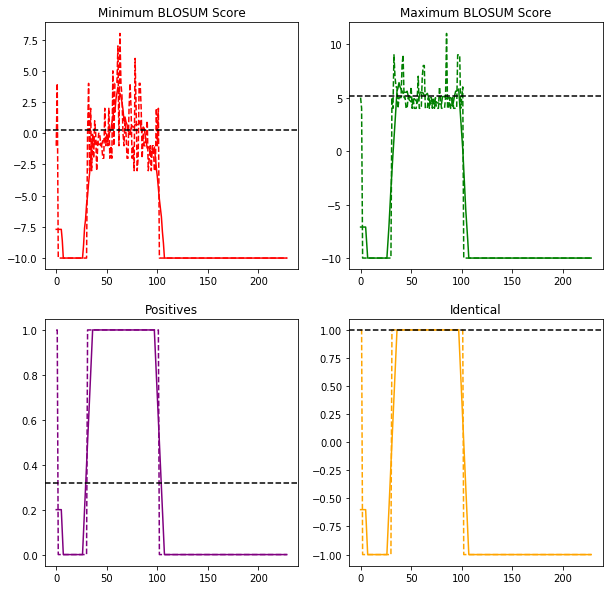

In [727]:
keys = list(figs)
i = 17
print keys[i]
figs[keys[i]]

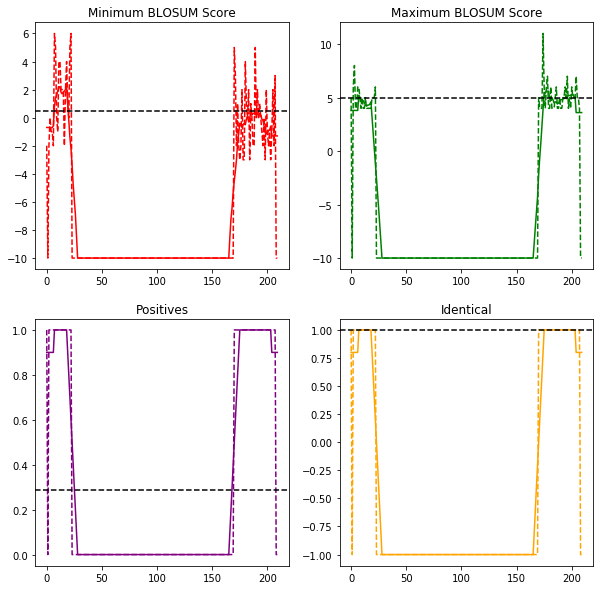

In [705]:
figs["orf6"]

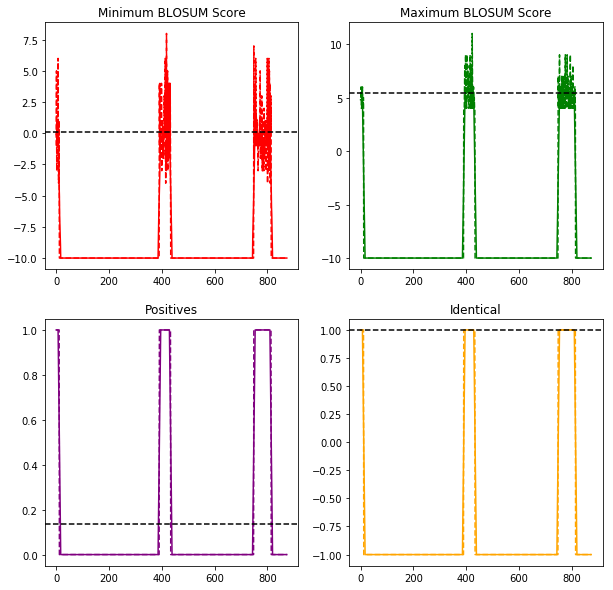

In [706]:
figs["orf8"]

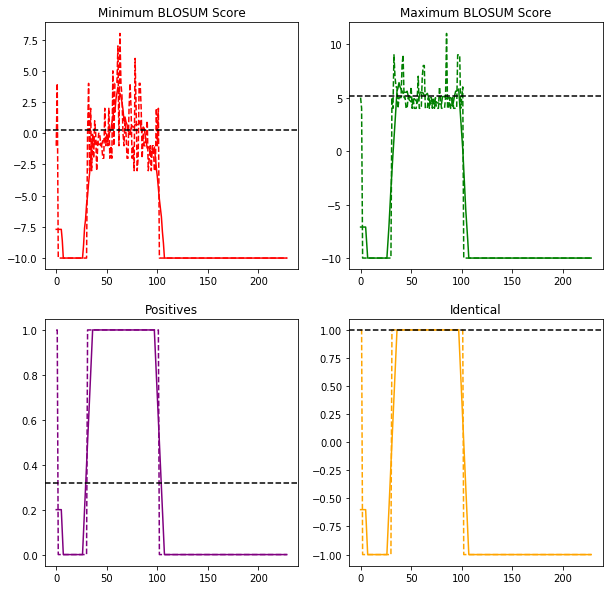

In [707]:
figs["orf9c"]

In [671]:
f = figs[k]

In [672]:
f.show()

In [619]:
fail

set()

In [626]:
[x for x in inputs if x[0] == "nsp7"]

[['nsp7',
  'SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINKLCEEMLDNRATLQ',
  [['1YSY', ['A']],
   ['2AHM', ['B', 'C', 'A', 'D']],
   ['2KYS', ['A']],
   ['5F22', ['A']],
   ['6NUR', ['C']]]]]

In [741]:
candidate_references[candidate_references["qseqid"] == "nsp2"]

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,Coverage,Score
98656,nsp2,4Q66:E,40.48,42,20,1,427,468,386,422,0.85,35.4,0.065831,0.028607
98657,nsp2,4Q66:K,27.27,88,53,3,427,514,422,498,4.40,33.1,0.137931,0.042630
98658,nsp2,1N7U:A,29.67,91,48,5,556,633,243,330,6.10,32.7,0.142633,0.047335
98659,nsp2,4Q66:B,45.16,31,17,0,425,455,338,368,7.70,32.3,0.048589,0.023275


In [621]:
pdb_fasta = my.fasta2dict("[REDACTED_PATH]/Homology_Modeling/PDB_All.fasta")

In [623]:
my.NWSeqAlignment(pdb_fasta["4Q66:E"], AADict["nsp2"], show_align=True)

Align1:    1 LSQTSI---- --PEVKVIGY ALH---QRRA RVGDLG---P PDLIFF---- --YCMGIDTS 42  
             -----+       |+    || -|-   ---| |-|---   - --|-|-       ||------     
Align2:    1 AYTRYVDNNF CGPD----GY PLECIKDLLA RAGKASCTLS EQLDFIDTKR GVYCCREHEH 56  

Align1:   43 DPTSITIFAK KITDLFLDTP -QISISSWNA FRKYDV---- --NII----- VVQTYIINSN 90  
             +----|--++ |--+  |-||  +|-++      +|+|-       |-+      +++|  |---     
Align2:   57 EIAWYTERSE KSYE--LQTP FEIKLA---- -KKFDTFNGE CPNFVFPLNS IIKT--IQPR 107 

Align1:   91 VNMIWAETFM SGIVRDI--- ---------- --MIMKDNRA DGE------- ---------- 118 
             |-----+-||  |-+|-+                 -+||-+--  ||                       
Align2:  108 VEKKKLDGFM -GRIRSVYPV ASPNECNQMC LSTLMKCDHC -GETSWQTGD FVKATCEFCG 165 

Align1:  119 SQNLVETLIF NPFTSGDVAN N-FIKLF-PL VYEKGVYLDA PTHVLNPSLT NNYLVETLVE 176 
             ++||-+-    ---|-|-+-- | -+|++ |- -+---|   - |-|-| ---- |---++|++-     
Align2:  166 TENLTKE--- GATTCGYLPQ NAVVKIYCPA CHNSEV---G PEHSL-AEYH NESGL

{'Align1': 'LSQTSI------PEVKVIGYALH---QRRARVGDLG---PPDLIFF------YCMGIDTSDPTSITIFAKKITDLFLDTP-QISISSWNAFRKYDV------NII-----VVQTYIINSNVNMIWAETFMSGIVRDI---------------MIMKDNRADGE-----------------SQNLVETLIFNPFTSGDVANN-FIKLF-PLVYEKGVYLDAPTHVLNPSLTNNYLVETLVEIVRLTKSLEACRKMLKKLIEIHPEAVIILIR--VYFACD----------------LEIDAVDLINEQLNSPSSFLADTSHIQLIFKSELLSIQSEFLLDVKR-DYKLAKEVAMEAVNCAPNEFK----TW------YLLTRIYIKLNDMSNALLSLNACPMSQVKEKYVLRAPILHLPLPNPMDVQLEQKSADPNLVNLSASSLK------STFQLAYKLLTEIVQITGWEQLLKYRSKIFVSKRLCERWLDNLFMLLYEDLKTYTDWQSEQLKLTVE-----WELFGL---------------CAKRLGHLPEAAKAFQIGLSQRFSPVCAK------------NLLQFYIDEHKRIRRDSTSSQILSSINDIDSSIIDLVVKICCWNHRWYIEFSIILIDALS--VAVQDMGITKVHNEIASRFSDPVA---QLIDDNILNFLKN------------FTNDTF-----',
 'Align2': 'AYTRYVDNNFCGPD----GYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYE--LQTPFEIKLA-----KKFDTFNGECPNFVFPLNSIIKT--IQPRVEKKKLDGFM-GRIRSVYPVASPNECNQMCLSTLMKCDHC-GETSWQTGDFVKATCEFCGTENLTKE---GATTCGYLPQNAVVKIYCPACHNSEV---GPEHSL-AEYHNESGLKTILRKGGRTIAFGGC---VFSYVGCHN

In [666]:
interactome["Bait"].value_counts()

orf8          47
nsp13         40
nsp7          32
M             30
orf9c         26
nsp8          24
nsp12         20
nsp9          16
N             15
orf9b         11
orf10          9
nsp4           8
orf3a          8
nsp2           7
E              6
nsp1           6
nsp10          5
nsp6           4
orf6           3
nsp14          3
nsp15          3
nsp5_C145A     2
orf7a          2
Spike          2
orf3b          1
nsp11          1
nsp5           1
Name: Bait, dtype: int64

In [736]:
s1 = "PVR IL17RA PLOD2 FKBP7 LOX PUSL1 COL6A1 FKBP10 GGH MFGE8 ADAM9 PCSK6 STC2 PLD3 HS6ST2 NPTX1 ERP44 CHPF2 POFUT1 GDF15 NEU1 PLAT INHBE CISD3 POGLUT2 SMOC1 FOXRED2 HYOU1 ERO1B UGGT2 SDF2 SIL1 OS9 NGLY1 TOR1A Orf8 G3BP1 G3BP2 FAM98A CSNK2B SNIP1 N CSNK2A2 ADAMTS1 NPC2 EDEM3 FBXL12 PLEKHF2 ERLEC1 TM2D3 POGLUT3 CHPF AP3B1 BRD2 SLC44A2 CWC27 BRD4 ZC3H18 E PSMD8 REEP6 REEP5 RTN4 SAAL1 PMPCB SUN2 VPS11 AKAP8 UBAP2L CLCC1 VPS39 Orf3a LARP1 MOV10 PABPC1 RRP9 RPL36 PABPC4 RBM28 UPF1 DDX21 STOML2 PITRM1 ZDHHC5 GOLGA7 PMPCA Orf3b GGCX ATP6V1A BZW2 FASTKD5 FAM8A1 INTS4 COQ8B ETFA CLIP4 JAKMIP1 GRIPAP1 C1orf50 ERC1 RDX PDZD11 CRTC3 ARF6 ALG5 ARL6IP6 TRIM59 HMOX1 LARP4B MYCBP2 CIT TBKBP1 TBK1 TLE3 TLE5 ECSIT TMEM39B ALG8 Nsp13 NUP210 IDE TIMM9 TIMM10 Nsp5 DNAJC11 TIMM29 TIMM10B ALG11 HDAC2 Nsp4 SEPSECS MEPCE MPHOSPH10 ATE1 MRPS25 NSD2 MRPS5 MRPS2 LARP7 MRPS27 Nsp8 RNF41 NUTF2 SRP72 EXOSC3 EXOSC2 EXOSC5 NARS2 EXOSC8 CCDC86 SRP19 Nsp15 AATF NGDN HECTD1 NOL10 SRP54 DDX10 Spike NINL PCNT TAPT1 FAR2 PIGO TMEM97 RETREG3 ERMP1 NLRX1 WFS1 PIGS UBXN8 GOLGB1 GOLGA3 GORASP1 GCC1 GOLGA2 GCC2 FYCO1 HSBP1 NUP58 EIF4H MAT2B ZNF503 NUP214 NUP62 NUP88 NUP54 Nsp9 ACAD9 NDUFAF1 USP13 MIPOL1 NDUFB9 TLE1 FBN2 TBCA HOOK1 PDE4DIP FBLN5 FBN1 Nsp11 TARS2 STOM TUBGCP2 AAR2 TUBGCP3 ANO6 ACADM AKAP8L YIF1A RAE1 DPH5 NUP98 SLC9A3R1 MTCH1 TOMM70 CHMP2A CSDE1 Orf6 SLC30A7 ATP1B1 AASS SLC30A9 SLC25A21 GHITM F2RL1 ABCC1 M DPY19L1 TMED5 SLC30A6 GPAA1 NDFIP2 BCS1L SCAP Orf9c MOGS DNAJC19 SCCPDH FAM162A RHOA MTARC1 ACSL3 TOR1AIP1 SELENOS AGPS QSOX2 PPIL3 RBM41 RALA NDUFAF2 SLU7 RIPK1 HS2ST1 COMT SBNO1 SCARB1 NAT14 PTGES2 CYB5R3 CYB5B Nsp7 RAB7A RAB2A RAB18 RAB14 RAB8A RAB1A RAB10 RAB5C DCAKD COLGALT1 POLA2 PRIM2 PRIM1 PKP2 POLA1 Nsp1 PRRC2B GLA PLEKHA5 LMAN2 GNG5 GNB1 SIRT5 IMPDH2 Nsp14 EIF4E2 SLC27A2 FKBP15 GIGYF2 POR WASHC4 RAP1GDS1 Nsp2 TCF12 TYSND1 UBAP2 BCKDK ZC3H7A USP54 ZNF318 Nsp12 TIMM8B THTPA PPT1 MAP7D1 Orf10 ELOB RBX1 ELOC ZYG11B CUL2 BAG5 MARK2 MARK1 DCTPP1 PTBP2 MARK3 Orf9b EMC1 MDN1 Orf7a HEATR3 ITGB1 DNMT1 ATP5MG ATP6AP1 ATP13A3 SIGMAR1 Nsp6 TRMT1 GPX1 Nsp5 C145A ERGIC1 GFER GRPEL1 AP2A2 AP2M1 Nsp10 SPART NEK9 DCAF7 MIB1 GTF2F2 PRKACA PRKAR2A PRKAR2B AKAP9 CEP250 CEP350 NIN CNTRL CDK5RAP2 CEP68 CEP112 CEP135 CENPF CEP43 Centrosome RNA Processing Stress Granules SARS CoV 2 Viral Protein (26) Spectral Count Human Protein (332) MIST Score Drug Target (62/332) 1.0 0.7 Protein Complex Biological Process Protein Kinase A Signaling Nuclear Pore Rab Signaling Exosome Signal Recognition Particle Mitochondrial Ribosome DNA Polymerase α ATPases Nuclear Pore TIM Complex AP2 Clathrin Protein Palmitoylation HOPS Complex TLE Family Golgi Apparatus Respiratory Electron Transport Cul2 Complex ER Protein Quality Control Fibrillin 7SK snRNP GPI-anchor Biosynthesis MARK Kinases ER Morphology Solute Carrier Family author/funder. It is made available under a CC-BY 4.0 International license. bioRxiv preprint doi: https://doi.org/10.1101/2020.03.22.002386. The copyright holder for this preprint (which was not peer-reviewed) is the".split()
len(set(s1))

451

In [124]:
inters = pd.read_csv("Bait_Prey_Pairs.txt", sep="\t")

In [125]:
inters["Bait"] = inters["Bait"].map(lambda x: "COVID19_{0}".format(x).replace("_", ""))

In [111]:
uni_info = pd.read_csv("[REDACTED_PATH]/eclair/data/uniprot_info.txt", sep="\t")

In [106]:
uni_info[uni_info["id"].map(lambda x: "covid" in x.lower())]

,id,entry name,reviewed,organism-id,lineage-id(SUPERKINGDOM),length,genes,feature(ALTERNATIVE SEQUENCE),protein names,sequence
15119,COVID19nsp5C145A,COVID19_nsp5_C145A,reviewed,9606,2759,306,nsp5_C145A,NaN,nsp5_C145A,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...
15120,COVID19orf7a,COVID19_orf7a,reviewed,9606,2759,121,orf7a,NaN,orf7a,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...
15121,COVID19orf10,COVID19_orf10,reviewed,9606,2759,38,orf10,NaN,orf10,MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT
15122,COVID19Spike,COVID19_Spike,reviewed,9606,2759,1273,Spike,NaN,Spike,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
15123,COVID19E,COVID19_E,reviewed,9606,2759,75,E,NaN,E,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...
15124,COVID19nsp5,COVID19_nsp5,reviewed,9606,2759,306,nsp5,NaN,nsp5,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...
15125,COVID19nsp4,COVID19_nsp4,reviewed,9606,2759,500,nsp4,NaN,nsp4,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...
15126,COVID19nsp7,COVID19_nsp7,reviewed,9606,2759,83,nsp7,NaN,nsp7,SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTT...
15127,COVID19nsp6,COVID19_nsp6,reviewed,9606,2759,290,nsp6,NaN,nsp6,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFA...
15128,COVID19nsp1,COVID19_nsp1,reviewed,9606,2759,180,nsp1,NaN,nsp1,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...


In [127]:
inters.to_csv("[REDACTED_PATH]/Collaborators/Eclair_Runs/2020_04_22_COVID19_Human_Interactome/Interactions.txt", sep="\t", header=None, index=None)

In [120]:
pd.read_pickle("[REDACTED_PATH]/Collaborators/Eclair_Runs/2020_04_22_COVID19_Human_Interactome/Predictions/COVID19orf7b_O00116.pkl")

,P1,P2,Prot,Pos,Res,Clf1,Clf2,Clf3,Clf4,Clf5,Clf6,Clf7,Clf8,TopClf,Pred
0,COVID19orf7b,O00116,0,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
1,COVID19orf7b,O00116,0,2,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
2,COVID19orf7b,O00116,0,3,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
3,COVID19orf7b,O00116,0,4,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
4,COVID19orf7b,O00116,0,5,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
5,COVID19orf7b,O00116,0,6,L,0.116622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.116622
6,COVID19orf7b,O00116,0,7,I,0.103234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.103234
7,COVID19orf7b,O00116,0,8,D,0.155898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.155898
8,COVID19orf7b,O00116,0,9,F,0.091471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.091471
9,COVID19orf7b,O00116,0,10,Y,0.117251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.117251


In [134]:
Fasta_Dict["orf9b"][11-1]

'A'